In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.112.56.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.112.56.234:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot


import warnings                      
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook   bu notebook zorlar ancak interaktif olarak imkan sağlar.

plt.rcParams["figure.figsize"] = (10,6)   # tüm grafikleri bu ölcüye sabitledik.
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")             # çizime özel yapılabilsede gridleri beyaz yaptı.
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # tüm floatları virgülden sonra 3 karakter verir.

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
df = pd.read_csv("/content/drive/MyDrive/creditcard1.csv")

In [5]:
!pip install pycaret

     |████████████████████████████████| 320 kB 5.5 MB/s 
     |████████████████████████████████| 116 kB 56.1 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 2.0 MB 49.1 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 167 kB 40.1 MB/s 
     |████████████████████████████████| 261 kB 65.0 MB/s 
     |████████████████████████████████| 1.3 MB 41.3 MB/s 
     |████████████████████████████████| 6.8 MB 42.6 MB/s 
     |████████████████████████████████| 1.7 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 836 kB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 636 kB 46.2 MB/s 
     |████████████████████████████████| 3.1 MB 46.8 MB/s 
     |████████████████████

The first step to setting up the environment is to import a module.
Depending upon the type of experiment needed to be performed.

The second step is to initialize the setup:
It is a mandatory step that should be done before any machine learning experiment.

As you know PyCaret helps in model deployment too, so all the experiment done is saved in a pipeline and this pipeline can be deployed into production with ease.

The Setup step covers a wide range of pre-processing tasks like:
Data Type Inference:
- It helps determine the correct data types for all the features.
Data Cleaning and Preparation:
- It automatically imputes the missing values present in the data.
- By default, the numerical values are imputed with mean and the categorical data are imputed with the mode.
- Also, Encoding of the categorical features is performed automatically.
Train Test Split:
- It automatically splits the data into train and test for modeling. In the case of classification problems, it uses stratified splits.
- By default, the split ratio is 70% train and 30% test. However, this can be changed by using a parameter within the setup. “train_size”.
- Evaluation of every ML model and hyperparameter optimization is done using K-Fold Cross-Validation.
Assigning Session ID as seed:
- Session id is a pseudo-random number generated by default if no session_id parameter is passed.
- PyCaret distributes this id as a seed in all the functions to isolate the effect of randomization.
- This allows for reproducibility at later date in the same or different environment.

In [7]:
from pycaret.classification import *
clf = setup(
            data=df, 
            target='Class', 
            session_id=44, 
            train_size=0.8,
            fold = 4
           )

,Description,Value
0,session_id,44
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Compare models
This function compares each model present in the PyCaret depending upon the problem statement.
Training of every model is done using the default hyperparameters and evaluates performance metrics using the cross-validation.

The output of the function is a table showing the average score of all models across the folds. The number of folds can be defined using the fold parameters within the compare_models function. By default, the fold is set to 10. The table is sorted (highest to lowest) by the metric of choice and can be defined using the sort parameter. By default, the table is sorted by Accuracy for classification experiments and R2 for regression experiments. Certain models are prevented for comparison because of their longer run-time. To bypass this prevention, the turbo parameter can be set to False.
To select the top n numbers of the model, include n_select hyperparameter within the compare_models function.

We can even sort it using the metrics.

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.000,0.954,0.791,0.947,0.861,0.861,0.865,22.540
rf,Random Forest Classifier,1.000,0.945,0.786,0.938,0.854,0.854,0.858,167.849
lda,Linear Discriminant Analysis,0.999,0.899,0.745,0.872,0.803,0.802,0.805,1.271
ada,Ada Boost Classifier,0.999,0.971,0.712,0.832,0.766,0.766,0.768,46.830
dt,Decision Tree Classifier,0.999,0.879,0.758,0.766,0.758,0.758,0.759,15.292
lr,Logistic Regression,0.999,0.941,0.633,0.838,0.717,0.717,0.726,8.262
ridge,Ridge Classifier,0.999,0.000,0.442,0.857,0.580,0.579,0.613,0.201
gbc,Gradient Boosting Classifier,0.999,0.650,0.490,0.829,0.592,0.591,0.623,248.314
knn,K Neighbors Classifier,0.998,0.617,0.061,0.900,0.112,0.112,0.222,4.261
dummy,Dummy Classifier,0.998,0.500,0.000,0.000,0.000,0.000,0.000,0.118


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=44, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

Creating Models
Creating a model in PyCaret is one of the simplest tasks.
The “create_model” function takes in just the model ID as a string and performs the task.

To use cross-validation during the training, we can include one more parameter “fold” inside the create_model function.
By default, the fold is set to 10.

After performing this we get a table of all the metrics rounded up to 4 decimal digits as an output.
Classification: Accuracy, AUC, Recall, Precision, F1, Kappa, MCC
Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

→ Classification:
+------------+---------------------------------+
|     ID     |              Name               |
+------------+---------------------------------+
| ‘lr’       | Logistic Regression             |
| ‘knn’      | K Nearest Neighbour             |
| ‘nb’       | Naives Bayes                    |
| ‘dt’       | Decision Tree Classifier        |
| ‘svm’      | SVM – Linear Kernel             |
| ‘rbfsvm’   | SVM – Radial Kernel             |
| ‘gpc’      | Gaussian Process Classifier     |
| ‘mlp’      | Multi Level Perceptron          |
| ‘ridge’    | Ridge Classifier                |
| ‘rf’       | Random Forest Classifier        |
| ‘qda’      | Quadratic Discriminant Analysis |
| ‘ada’      | Ada Boost Classifier            |
| ‘gbc’      | Gradient Boosting Classifier    |
| ‘lda’      | Linear Discriminant Analysis    |
| ‘et’       | Extra Trees Classifier          |
| ‘xgboost’  | Extreme Gradient Boosting       |
| ‘lightgbm’ | Light Gradient Boosting         |
| ‘catboost’ | CatBoost Classifier             |
+------------+---------------------------------


Regression:
+------------+-----------------------------------+
|     ID     |               Name                |
+------------+-----------------------------------+
| ‘lr’       | Linear Regression                 |
| ‘lasso’    | Lasso Regression                  |
| ‘ridge’    | Ridge Regression                  |
| ‘en’       | Elastic Net                       |
| ‘lar’      | Least Angle Regression            |
| ‘llar’     | Lasso Least Angle Regression      |
| ‘omp’      | Orthogonal Matching Pursuit       |
| ‘br’       | Bayesian Ridge                    |
| ‘ard’      | Automatic Relevance Determination |
| ‘par’      | Passive Aggressive Regressor      |
| ‘ransac’   | Random Sample Consensus           |
| ‘tr’       | TheilSen Regressor                |
| ‘huber’    | Huber Regressor                   |
| ‘kr’       | Kernel Ridge                      |
| ‘svm’      | Support Vector Machine            |
| ‘knn’      | K Neighbors Regressor             |
| ‘dt’       | Decision Tree                     |
| ‘rf’       | Random Forest                     |
| ‘et’       | Extra Trees Regressor             |
| ‘ada’      | AdaBoost Regressor                |
| ‘gbr’      | Gradient Boosting Regressor       |
| ‘mlp’      | Multi Level Perceptron            |
| ‘xgboost’  | Extreme Gradient Boosting         |
| ‘lightgbm’ | Light Gradient Boosting           |
| ‘catboost’ | CatBoost Regressor                |
+------------+-----------------------------------

Clustering:
+-------------+----------------------------------+
|     ID      |               Name               |
+-------------+----------------------------------+
| ‘kmeans’    | K-Means Clustering               |
| ‘ap’        | Affinity Propagation             |
| ‘meanshift’ | Mean shift Clustering            |
| ‘sc’        | Spectral Clustering              |
| ‘hclust’    | Agglomerative Clustering         |
| ‘dbscan’    | Density-Based Spatial Clustering |
| ‘optics’    | OPTICS Clustering                |
| ‘birch’     | Birch Clustering                 |
| ‘kmodes’    | K-Modes Clustering               |

→ Anomaly Detection:
+-------------+-----------------------------------+
|     ID      |               Name                |
+-------------+-----------------------------------+
| ‘abod’      | Angle-base Outlier Detection      |
| ‘iforest’   | Isolation Forest                  |
| ‘cluster’   | Clustering-Based Local Outlier    |
| ‘cof’       | Connectivity-Based Outlier Factor |
| ‘histogram’ | Histogram-based Outlier Detection |
| ‘knn’       | k-Nearest Neighbors Detector      |
| ‘lof’       | Local Outlier Factor              |
| ‘svm’       | One-class SVM detector            |
| ‘pca’       | Principal Component Analysis      |
| ‘mcd’       | Minimum Covariance Determinant    |
| ‘sod’       | Subspace Outlier Detection        |
| ‘sos        | Stochastic Outlier Selection      

→ NLP:
+-------+-----------------------------------+
|  ID   |               Model               |
+-------+-----------------------------------+
| ‘lda’ | Latent Dirichlet Allocation       |
| ‘lsi’ | Latent Semantic Indexing          |
| ‘hdp’ | Hierarchical Dirichlet Process    |
| ‘rp’  | Random Projections                |
| ‘nmf’ | Non-Negative Matrix Factorization |

Tune Model
It provides just one line function to perform hyperparameter tuning of any model present in the PyCaret Library.
It tunes the hyperparameter of the model passed as an estimator using a Random grid search with pre-defined grids that are fully customizable.

First, create a model

Tune the model

In [9]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.000,0.921,0.769,0.909,0.833,0.833,0.836
1,1.000,0.947,0.795,0.939,0.861,0.861,0.864
2,1.000,0.947,0.744,0.935,0.829,0.828,0.834
3,1.000,0.936,0.750,0.968,0.845,0.845,0.852
4,1.000,0.973,0.825,0.892,0.857,0.857,0.858
5,0.999,0.947,0.769,0.882,0.822,0.822,0.824
6,1.000,0.948,0.821,1.000,0.901,0.901,0.906
7,1.000,0.961,0.769,0.938,0.845,0.845,0.849
8,1.000,0.934,0.821,1.000,0.901,0.901,0.906


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [11]:
rf3 = create_model("rf", fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.000,0.918,0.756,0.943,0.839,0.839,0.844
1,1.000,0.941,0.785,0.911,0.843,0.843,0.845
2,1.000,0.949,0.794,0.904,0.846,0.845,0.847
Mean,1.000,0.936,0.778,0.919,0.843,0.842,0.845
Std,0.000,0.013,0.016,0.017,0.003,0.003,0.001


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf3 = tune_model(rf3)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Pr

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:08:22
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Random Forest Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Plot a Model

It helps in checking the performance of a model with different graphs in one line of code.

→ Classification:
+-----------------------------+--------------------+
|            Name             |        Plot        |
+-----------------------------+--------------------+
| Area Under the Curve        | ‘auc’              |
| Discrimination Threshold    | ‘threshold’        |
| Precision Recall Curve      | ‘pr’               |
| Confusion Matrix            | ‘confusion_matrix’ |
| Class Prediction Error      | ‘error’            |
| Classification Report       | ‘class_report’     |
| Decision Boundary           | ‘boundary’         |
| Recursive Feature Selection | ‘rfe’              |
| Learning Curve              | ‘learning’         |
| Manifold Learning           | ‘manifold’         |
| Calibration Curve           | ‘calibration’      |
| Validation Curve            | ‘vc’               |
| Dimension Learning          | ‘dimension’        |
| Feature Importance          | ‘feature’          |
| Model Hyperparameter        | ‘parameter’        |

→ Regression:
+-----------------------------+-------------+
|            Name             |    Plot     |
+-----------------------------+-------------+
| Residuals Plot              | ‘residuals’ |
| Prediction Error Plot       | ‘error’     |
| Cooks Distance Plot         | ‘cooks’     |
| Recursive Feature Selection | ‘rfe’       |
| Learning Curve              | ‘learning’  |
| Validation Curve            | ‘vc’        |
| Manifold Learning           | ‘manifold’  |
| Feature Importance          | ‘feature’   |
| Model Hyperparameter        | ‘parameter’ |

→ Clustering:
+-----------------------+----------------+
| Cluster PCA Plot (2d) |   ‘cluster’    |
+-----------------------+----------------+
| Cluster TSnE (3d)     | ‘tsne’         |
| Elbow Plot            | ‘elbow’        |
| Silhouette Plot       | ‘silhouette’   |
| Distance Plot         | ‘distance’     |
| Distribution Plot     | ‘distribution’ |
+-----------------------+----------------+

→ Anomaly Detection:
+---------------------------+--------+
| t-SNE (3d) Dimension Plot | ‘tsne’ |
+---------------------------+--------+
| UMAP Dimensionality Plot  | ‘umap’ |

→ Natural Language Processing:
+---------------------------+----------------------+
|           Name            |         Plot         |
+---------------------------+----------------------+
| Word Token Frequency      | ‘frequency’          |
| Word Distribution Plot    | ‘distribution’       |
| Bigram Frequency Plot     | ‘bigram’             |
| Trigram Frequency Plot    | ‘trigram’            |
| Sentiment Polarity Plot   | ‘sentiment’          |
| Part of Speech Frequency  | ‘pos’                |
| t-SNE (3d) Dimension Plot | ‘tsne’               |
| Topic Model (pyLDAvis)    | ‘topic_model’        |
| Topic Infer Distribution  | ‘topic_distribution’ |
| Word cloud                | ‘wordcloud’          |
| UMAP Dimensionality Plot  | ‘umap                |

In [3]:
from keras.utils.vis_utils import plot_model

In [5]:
plot_model(rf3, plot = 'confusion_matrix')

NameError: ignored

In [ ]:
plot_model(tuned_rf3, plot = 'confusion_matrix'

In [ ]:
plot_model(rf3, plot = 'boundary')

In [ ]:
plot_model(tuned_rf3, plot = 'boundary')

In [ ]:
pplot_model(rf3, plot = 'class_report')

In [ ]:
pplot_model(tuned_rf3, plot = 'class_report')

Interpret Model
After building a model one of the most important task is to interpret the results.
Model Interpretability helps debug the model by analyzing what the model really thinks is important.
model = create_model('Model_name')
interpret_model(model)

In [ ]:
predict_model(rf3)

In [ ]:
predict_model(tuned_rf3)

In [ ]:
finalized_rf3 = finalize_model(tuned_rf3)

Finalize Model
It is the last step of building a model in PyCaret.
This function takes a trained model object and returns a model that has been trained on the entire dataset.
model = create_model('Model_name')
finalize_model(model)

In [ ]:
save_model(finalized_rf3, 'fraud_rf3_v1')

In [ ]:
fraud_rf_saved = load_model('fraud_rf3_v1')

In [ ]:
Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                interaction_constraints='', learning_rate=0.4,
                                max_delta_step=0, max_depth=8,
                                min_child_weight=3, missing=nan,
                                monotone_constraints='()', n_estimators=140,
                                n_jobs=-1, num_parallel_tree=1,
                                objective='multi:softprob', random_state=44,
                                reg_alpha=0.1, reg_lambda=1e-07,
                                scale_pos_weight=12.100000000000001, subsample=1,
                                tree_method='auto', use_label_encoder=True,
                                validate_parameters=1, verbosity=0)]],
          verbose=False),
 'fraud_rf_saved_2022-04-23 12:39.pkl')

In [ ]:
Deploy Model:

Once a model is finalized after experimenting on the dataset it can be saved using the “save_model” function.

The “save_model” saves the pipeline and the trained model this can be used in applications as a binary pickle file.

An alternative and a low code possibility to deploy the model on the cloud can be done using PyCaret’s “deploy_model” function.

Models can easily be deployed in AWS using the PyCaret.

Before deploying a model to an AWS S3 (‘aws’), environment variables must be configured using the command-line interface. To configure AWS environment variables, type aws configure in your python command line. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:
AWS Access Key ID
AWS Secret Key Access
Default Region Name (can be seen under Global settings on your AWS console)
Default output format (must be left blank)

model = create_model('Model_name')
final_model = finalize_model(model)
deploy_model(final_model, model_name = 'Model_name_aws', platform = 'aws', 
             authentication = {'bucket' : 'pycaret-test'})

This deployed model can also be used to predict.

predictions = predict_model(model_name = 'lr_aws', data = data_unseen, platform = 'aws', authentication = { 'bucket' : 'pycaret-test' })

In [ ]:
Preprocessing (Setup) aşamasına geri dönecek olursak normalization yapmak için:
    
data_2=setup(data=data,target="Type",train_size = 0.8,normalize=True)


İmbalanced veri setleri için oversampling, undersampling gibi işlemler de yapılabilmektedir.

data_2=setup(data=data,target="Type",train_size = 0.8,fix_imbalance=True)


Belirtilen şekilde SMOTE metodu ile Oversampling yapılmaktadır. Başka metodlar kullanmak için:
    
import imblearn
data_2=setup(data=data,target="Type",train_size = 0.8,fix_imbalance=True,fix_imbalance_method=imblearn.over_sampling.BorderlineSMOTE())

imblearn metodları veya fit_resample metodu olan herhangi bir class ile işlemler yapılabilir.

https://www.youtube.com/watch?v=MVbH6vSD8Gg     PyCaret Kaggle

In [ ]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.100,Ideal,H,SI1,VG,EX,GIA,5169
1,0.830,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.850,Ideal,H,SI1,EX,EX,GIA,3183
3,0.910,Ideal,E,SI1,VG,VG,GIA,4370
4,0.830,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

In [ ]:
# plot histogram
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

In [ ]:
# create a copy of data
data_copy = data.copy()

# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])

# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

In [ ]:
# compare all models
best = compare_models()

In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

In [ ]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

In [ ]:
save_model(final_best, 'diamond-pipeline')

In [ ]:
# within notebook (notice ! sign infront)
!mlflow ui

# on command line in the same folder
mlflow ui

In [ ]:
# load model
from pycaret.regression import load_model
pipeline = load_model('model')
# print pipeline
print(pipeline)

In [ ]:
# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)


# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

In [ ]:
from pycaret.datasets import get_data
data = get_data('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
clf1 = setup(data = data, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

,Description,Value
0,session_id,2644
1,Target,Survived
2,Original Data,"(891, 12)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(623, 24)"


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.263,0.132,0.361,0.439,0.254,0.340,0.083
lightgbm,Light Gradient Boosting Machine,0.264,0.137,0.368,0.416,0.257,0.330,0.115
br,Bayesian Ridge,0.290,0.140,0.372,0.406,0.263,0.369,0.015
ridge,Ridge Regression,0.288,0.140,0.373,0.405,0.263,0.364,0.015
lr,Linear Regression,0.288,0.141,0.374,0.401,0.265,0.362,0.591
ada,AdaBoost Regressor,0.305,0.145,0.380,0.381,0.274,0.335,0.032
rf,Random Forest Regressor,0.245,0.148,0.384,0.366,0.270,0.308,0.516
omp,Orthogonal Matching Pursuit,0.300,0.150,0.386,0.359,0.274,0.384,0.016
et,Extra Trees Regressor,0.244,0.177,0.419,0.243,0.293,0.309,0.457
huber,Huber Regressor,0.220,0.190,0.434,0.189,0.301,0.334,0.058


In [ ]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2644, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
plot_model(best, plot = 'auc')

SystemExit: ignored

In [ ]:
plot_model(best, plot = 'confusion_matrix')

ValueError: ignored

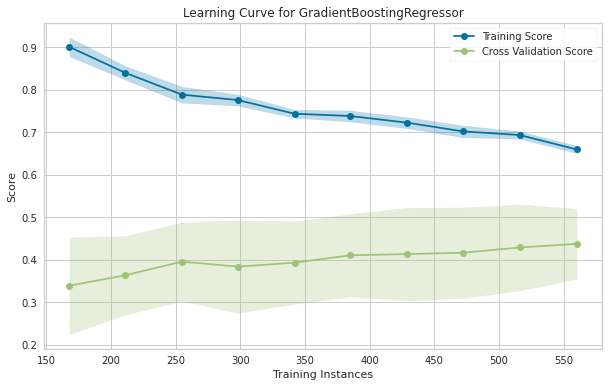

In [ ]:
plot_model(best, plot = 'learning')

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.277,0.143,0.378,0.391,0.269,0.329


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Embarked_not_available,Survived,Label
0,24.000,16.100,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,0.170
1,70.000,71.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,0.280
2,36.000,27.750,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,0.181
3,33.000,27.750,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1,0.906
4,66.000,10.500,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,-0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,59.000,13.500,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,0.014
264,48.000,13.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0,0.054
265,31.000,26.250,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1,0.898
266,29.314,24.150,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0,0.247


In [ ]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.225,0.100,0.317,0.576,0.223,0.283


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0.086
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.998
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0.667
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1.039
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.114


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categ...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                             

In [ ]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                      display_types=False,
                                      features_todrop=['Name', 'Ticket',
                                                       'Cabin'],
                                      id_columns=['PassengerId'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categ...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nod

In [ ]:
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791,6559.830
1,59,81799,0.791,5417.661
2,62,74751,0.703,9258.993
3,59,74373,0.766,7346.335
4,87,17760,0.349,16869.507


In [ ]:
from pycaret.clustering import *
s = setup(data, normalize = True)

In [ ]:
kmeans = create_model('kmeans')

In [ ]:
print(kmeans)

In [ ]:
evaluate_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
result = assign_model(kmeans)
result.head()

In [ ]:
predictions = predict_model(kmeans, data = data)
predictions.head()

In [ ]:
save_model(kmeans, 'kmeans_pipeline')

In [ ]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

In [ ]:
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.264,0.765,0.138,0.935,0.606,0.519,0.912,0.608,0.724,0.734
1,0.546,0.654,0.066,0.228,0.845,0.837,0.272,0.332,0.429,0.367
2,0.337,0.539,0.193,0.554,0.075,0.333,0.366,0.861,0.899,0.089
3,0.092,0.995,0.014,0.176,0.242,0.515,0.562,0.159,0.074,0.208
4,0.325,0.806,0.957,0.332,0.308,0.355,0.502,0.558,0.885,0.183


In [ ]:
from pycaret.anomaly import *
s = setup(data)

In [ ]:
iforest = create_model('iforest')
print(iforest)

In [ ]:
models()

In [ ]:
plot_model(iforest, plot = 'tsne')

In [ ]:
plot_model(iforest, plot = 'umap')

In [ ]:
result = assign_model(iforest)
result.head()

In [ ]:
predictions = predict_model(iforest, data = data)
predictions.head()

In [ ]:
save_model(iforest, 'iforest_pipeline')

In [ ]:
loaded_model = load_model('iforest_pipeline')
print(loaded_model)

In [ ]:
# load dataset
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [ ]:
# print first document
print(data['en'][0])

"Banco Esperanza" is a group of 10 women looking to receive a small loan. Each of them has taken out a very small loan already, so this would be their second. With this loan the group is going to try and expand their small businesses and start generating more income. <P>

Eduviges is the group representative and leader of the group. Eduviges has a lot on the line because she has 6 children that she has to take care of. She told me that those children are the reason she wants to be successful. She wants to be able to provide a different life for them and show them that they can be successful as well. <P>

Eduviges has a very small business selling shoes and Avon products. She plans to expand using this loan and dreams of success. The whole group is ready for this new challenge and are on the road to bettering their lives. On behalf of Eduviges, the group, and Esperanza International--------- Thank you for your support!!!!


In [ ]:
# init setup
from pycaret.nlp import *
s = setup(data, target = 'en')

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


IntProgress(value=0, description='Processing: ', max=11)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:27:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Step,. . . . . . . . . . . . . . . . . .,Step 0 of 9


ValueError: ignored

In [ ]:
models()

In [ ]:
lda = create_model('lda')
print(lda)

In [ ]:
plot_model(lda, plot = 'frequency')

In [ ]:
plot_model(lda, plot = 'sentiment')

In [ ]:
evaluate_model(lda)

In [ ]:
lda_results = assign_model(lda)
lda_results.head()

In [ ]:
save_model(lda, 'my_lda_model')

In [ ]:
from pycaret.datasets import get_data
data = get_data('diabetes')

In [ ]:
x = data.drop('Outcom',axis = 1)
y = data['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 123)

In [ ]:
Log_model = LogisticRegression().fit(x_train,y_train)
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
random_model = RandomForestClassifier().fit(x_train,y_train)
extra_model = ExtraTreesClassifier().fit(x_train,y_train)
cat_model = CatBoostClassifier().fit(x_train,y_train)
xgb_model = XGBClassifier().fit(x_train,y_train)
KNN_model = KNeighborsClassifier().fit(x_train,y_train)

In [ ]:
def evaluate_classification_model(model,x_test,y_test):
  pred = model.predict(x_test)
  print("Accuarcy Score : ",accuracy_score(y_test,pred))
  print("Auc score : ",roc_auc_score(y_test,pred))
  print("Recall Score : ",recall_score(y_test,pred))
  print("Precision Score : ",precision_score(y_test,pred))
  print("F1 Score : ",f1_score(y_test,pred))
  print("Kappa Score : ",cohen_kappa_score(y_test,pred))
  print("MCC Score : ",matthews_corrcoef(y_test,pred))

In [ ]:
# Setting up the PyCaret environment

class = setup(data = df, target = 'Outcome')

In [ ]:
# Compare models

compare_models()

In [ ]:
compare_models(n_select = n)

In [ ]:
# We can even sort it using the metrics.

compare_models(n_select = 3, sort='F1')

In [ ]:
# Creating Models

create_model('model_ID')

In [ ]:
# Tune Model

tuned = tune_model(dt, n_iter = 50)

In [ ]:
# Plot a Model

model = create_model('Model_name')
plot_model(model)

In [ ]:
# Interpret Model

model = create_model('Model_name')
interpret_model(model)

In [ ]:
# Finalize Model

model = create_model('Model_name')
finalize_model(model)

In [ ]:
# Save Models

save_model(tuned)